In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygbif

# Load the data
data = pd.read_csv('../data/biodiversity/raw/00173  44-250310093411724.csv', delimiter="\t")

C:\Users\olexs\AppData\Local\Temp\ipykernel_884\4234054125.py:7: DtypeWarning: Columns (10,14,16,36,37,38,39,40,41,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/biodiversity/raw/0017344-250310093411724.csv', delimiter="\t")


Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


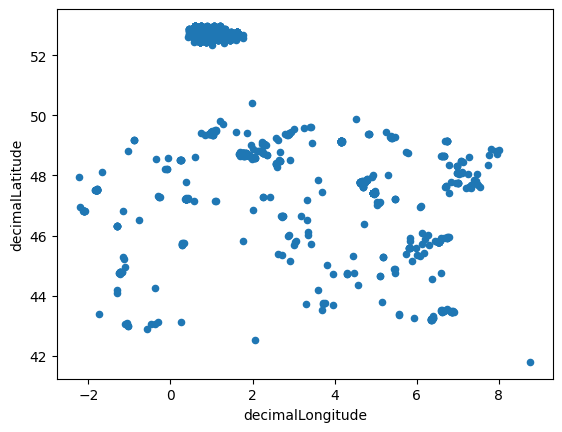

In [2]:
print(data.columns)
data.head(1000).plot(x='decimalLongitude', y='decimalLatitude', kind='scatter')
plt.show()

In [4]:
years = range(1990, 2024)
occurences_recorded_per_year = [pygbif.occurrences.search(year = x)["count"] for x in years]

In [ ]:

area_europe = "POLYGON((34.508174 -40.898441, 74.074077 -40.898441, 74.074077 48.046871, 34.508174 48.046871, 34.508174 -40.898441))"
occurences_recorded_per_year_europe = [pygbif.occurrences.search(year = x, geometry = area_europe)["count"] for x in years]


In [14]:
relevant_data = data[["gbifID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "countryCode", "occurrenceStatus", "decimalLatitude", "decimalLongitude", "day", "month", "year", "recordedBy"]]


x = years
# normalize by number of small observers
y_normalized_by_small_obs = []
# normalize by number of all observers
y_normalized_by_all_obs = []
# raw number of records
y_raw = []
# normalize by amount of observations made by small observers
y_normalized_by_small_obs_occ = []


for year in x:
    num_records = relevant_data["species"].loc[relevant_data["year"] == year].value_counts()["Sturnus vulgaris"]
    observers = relevant_data["recordedBy"].loc[relevant_data["year"] == year].value_counts()
    small_observers = observers[observers < 50]
    num_small_observers = len(small_observers)
    occ_by_small_observers = sum(small_observers)
    
    y_normalized_by_small_obs.append(num_records / num_small_observers)
    y_normalized_by_all_obs.append(num_records/len(observers))
    y_raw.append(num_records)
    y_normalized_by_small_obs_occ.append(num_records/occ_by_small_observers)
    
fig = plt.subplots(2,2)

ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)


ax1.plot(x, y_raw)
ax1.set_title("Raw number of records")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of records")
ax2.plot(x, y_normalized_by_small_obs)
ax2.set_title("Normalized by number of small observers")
ax2.set_xlabel("Year")
ax2.set_ylabel("Number of records")
ax3.plot(x, y_normalized_by_all_obs)
ax3.set_title("Normalized by number of all observers")
ax3.set_xlabel("Year")
ax3.set_ylabel("Number of records")
ax4.plot(x, y_normalized_by_small_obs_occ)
ax4.set_title("Normalized by amount of observations made by small observers")
ax4.set_xlabel("Year")
ax4.set_ylabel("Number of records")

plt.tight_layout()
plt.show()

KeyError: 'Sturnus vulgaris'

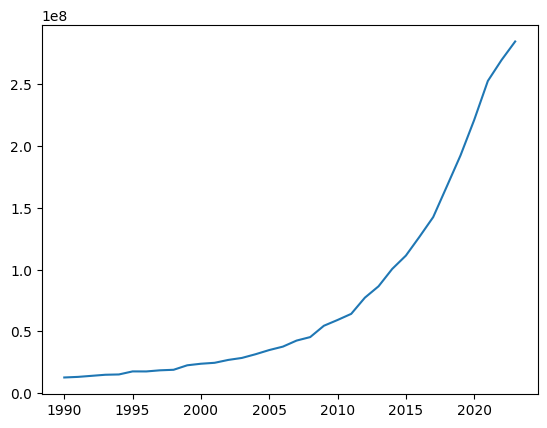

In [5]:

plt.plot(years, occurences_recorded_per_year)
plt.show()

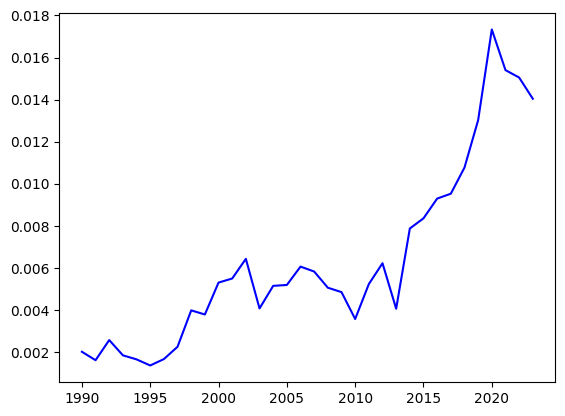

In [9]:
from pygbif import species
from pygbif import occurrences

species_name = "Passer domesticus"
species_key = species.name_backbone(name=species_name)["usageKey"]


x = years
y_species = []
y_general = []
y_proportion = []
for count, year in enumerate(x):
    
    num_records_species = pygbif.occurrences.search(
        taxonKey=species_key, year=year, geometry=area_europe
        )["count"]
    
    y_species.append(num_records_species)
    
    y_general.append(occurences_recorded_per_year[count])
    
    y_proportion.append(num_records_species/occurences_recorded_per_year_europe[count])
    
fig, ax1 = plt.subplots()
#generate plot
ax1.plot(x, y_proportion, 'b-')
plt.show()

In [21]:
header = pd.read_csv('../data/biodiversity/raw/0019123-250310093411724.csv', nrows=0)
print(f"Available columns: {header.columns.tolist()}")

Available columns: ['gbifID\tdatasetKey\toccurrenceID\tkingdom\tphylum\tclass\torder\tfamily\tgenus\tspecies\tinfraspecificEpithet\ttaxonRank\tscientificName\tverbatimScientificName\tverbatimScientificNameAuthorship\tcountryCode\tlocality\tstateProvince\toccurrenceStatus\tindividualCount\tpublishingOrgKey\tdecimalLatitude\tdecimalLongitude\tcoordinateUncertaintyInMeters\tcoordinatePrecision\televation\televationAccuracy\tdepth\tdepthAccuracy\teventDate\tday\tmonth\tyear\ttaxonKey\tspeciesKey\tbasisOfRecord\tinstitutionCode\tcollectionCode\tcatalogNumber\trecordNumber\tidentifiedBy\tdateIdentified\tlicense\trightsHolder\trecordedBy\ttypeStatus\testablishmentMeans\tlastInterpreted\tmediaType\tissue']


try database stuff u kno

In [2]:
import duckdb
import pandas as pd

In [20]:
conn = duckdb.connect("../data/climate_biodiversity.duckdb")

conn.sql("DELETE FROM biodiversity WHERE scientific_name IN ('BOLD:AAB0360' , 'BOLD:AAA8254 ')")

conn.commit()

species = conn.sql("SELECT species, COUNT(*) FROM biodiversity GROUP BY species").to_df()

conn.close()


In [21]:
species = species[species["count_star()"] > 500]
species

,species,count_star()
0,Sciurus carolinensis,291683
1,Sturnus vulgaris,5228941
2,Passer domesticus,5743488
